## Exploracion basica de un archivo .mat

El siguiente notebook explora de manera sencilla un archivo de matlab donde se guarda la información de un sensor.

In [ ]:
import scipy.io
from scipy import signal
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown, display

In [ ]:
# prompt: necesito cargar un archivo mat que esta en esta misma carpeta usando pandas

import scipy.io
import pandas as pd

# Ruta al archivo .mat en Google Drive
mat_file_path = base_path + '/S1_A1_E1.mat'  # Reemplaza con la ruta correcta
mat_data = scipy.io.loadmat(mat_file_path)
keys_mat_data = list(mat_data.keys())
print(keys_mat_data)
column_names = keys_mat_data[3:]
print(column_names)

['__header__', '__version__', '__globals__', 'emg', 'stimulus', 'glove', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition']
['emg', 'stimulus', 'glove', 'subject', 'exercise', 'repetition', 'restimulus', 'rerepetition']


In [ ]:
# Funciones sobre las señales

# Numero del estimulo
def indice_numero(df, num):
  return (df.index[df == num][0],df.index[df == num][-1])

# Cambios de nivel
def detectar_cambios_nivel(data, valor):
    cambios = []
    for i in range(1, len(data)):
        if data[i] == valor and data[i-1] != valor:
            cambios.append((i-1,0))
            cambios.append((i,valor))
        elif data[i] != valor and data[i-1] == valor:
            cambios.append((i-1,valor))
            cambios.append((i,0))
    cambios.pop(0)
    cambios.pop()
    return cambios

In [ ]:
# Funciones de graficado

def graficar_serie1(serie, punto_inicial = 0, num_puntos = 1000, titulo=None, etiqueta_x=None, etiqueta_y=None):
    # Si se especifica num_puntos, selecciona solo los primeros num_puntos de la Serie
    if num_puntos:
        serie = serie.iloc[punto_inicial:punto_inicial + num_puntos]


    plt.figure(figsize=(20, 1))  # Ajusta el tamaño del gráfico

    plt.plot(serie)  # Dibuja la serie con puntos marcados
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.grid(True)  # Activa la cuadrícula
    plt.show()

def graficar_serie2(df_medida, df_label, num, titulo=None, etiqueta_x=None, etiqueta_y=None):
    [inicio,fin]= indice_numero(df_label, num)
    num_puntos = fin - inicio
    ban_end = False
    ban_add_vertical_lines = False
    lim = [0 , 0]
    limites_x = []

    # Si se especifica num_puntos, selecciona solo los primeros num_puntos de la Serie
    if num_puntos:
        df_medida = df_medida.iloc[inicio:inicio + num_puntos]
    fig, ax = plt.subplots(figsize=(20, 5))

    cambios_nivel = detectar_cambios_nivel(df_label, num)
    # Añadir las bandas verticales sombreadas con los límites proporcionados
    for cambio_nivel in cambios_nivel:
      if(cambio_nivel[1] == 0):
        if ban_end == False:
          lim[0] = cambio_nivel[0]
          ban_end = True
        else:
          lim[1] = cambio_nivel[0]
          ban_end = False
          ax.axvspan(lim[0], lim[1], color='gray', alpha=0.3, label=f'Sombreado entre {lim[0]} y {lim[1]}')

    plt.plot(df_medida)  # Dibuja la serie con puntos marcados
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.grid(True)  # Activa la cuadrícula
    plt.show()

def graficar_serie3(df_medida, df_num_label, num, titulo=None, etiqueta_x=None, etiqueta_y=None):
    [inicio,fin]= indice_numero(df_num_label, num)
    num_puntos = fin - inicio
    ban_end = False
    ban_add_vertical_lines = False
    lim = [0 , 0]
    limites_x = []

    # Si se especifica num_puntos, selecciona solo los primeros num_puntos de la Serie
    if num_puntos:
        df_medida = df_medida.iloc[inicio:inicio + num_puntos]
    fig, ax = plt.subplots(figsize=(20, 5))

    cambios_nivel = detectar_cambios_nivel(df_num_label, num)
    # Añadir las bandas verticales sombreadas con los límites proporcionados
    for cambio_nivel in cambios_nivel:
      if(cambio_nivel[1] == 0):
        if ban_end == False:
          lim[0] = cambio_nivel[0]
          ban_end = True
        else:
          lim[1] = cambio_nivel[0]
          ban_end = False
          ax.axvspan(lim[0], lim[1], color='gray', alpha=0.3, label=f'Sombreado entre {lim[0]} y {lim[1]}')

    plt.plot(df_medida)  # Dibuja la serie con puntos marcados
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.grid(True)  # Activa la cuadrícula
    plt.show()

def graficar_series4(df_medida, columnas_medida, df_num_label, num, titulo=None, etiqueta_x=None, etiqueta_y=None):
    [inicio,fin]= indice_numero(df_num_label, num)
    num_puntos = fin - inicio
    ban_end = False
    ban_add_vertical_lines = False
    lim = [0 , 0]
    limites_x = []

    # Si se especifica num_puntos, selecciona solo los primeros num_puntos de la Serie
    fig, ax = plt.subplots(figsize=(20, 5))
    if num_puntos:
        for columna in columnas_medida:
           df_col = df_medida[columna].iloc[inicio:inicio + num_puntos]
           plt.plot(df_col.index, df_col, label=columna)  # Graficar cada columna



    cambios_nivel = detectar_cambios_nivel(df_num_label, num)
    # Añadir las bandas verticales sombreadas con los límites proporcionados
    for cambio_nivel in cambios_nivel:
      if(cambio_nivel[1] == 0):
        if ban_end == False:
          lim[0] = cambio_nivel[0]
          ban_end = True
        else:
          lim[1] = cambio_nivel[0]
          ban_end = False
          ax.axvspan(lim[0], lim[1], color='gray', alpha=0.3, label=f'Sombreado entre {lim[0]} y {lim[1]}')

    #plt.plot(df_medida)  # Dibuja la serie con puntos marcados
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.grid(True)  # Activa la cuadrícula
    plt.show()


def graficar_varias_columnas(df, columnas, titulo=None, etiqueta_x= None, etiqueta_y=None):
    plt.figure(figsize=(20, 4))  # Tamaño del gráfico

    # Iterar sobre cada columna en la lista de columnas
    for columna in columnas:
        plt.plot(df.index, df[columna], label=columna)  # Graficar cada columna

    # Añadir títulos y etiquetas
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.legend()  # Añadir la leyenda para distinguir las columnas
    plt.grid(True)  # Añadir cuadrícula
    plt.show()

Segun la IA el archivo .mat tiene:
* **`emg`**: Matriz con las señales EMG (10 columnas)
* **`glove`**: Matriz con datos del CyberGlove (22 columnas)
* **`stimulus`**: Vector con etiquetas de movimientos
* **`repetition`**: Vector con números de repetición
* **`rerepetition`**: Vector indicando repeticiones adicionales
* **`subject`**: Número de sujeto
* **`exercise`**: Número de ejercicio

In [ ]:
# Creacion de un diccionario a partir del archivo .mat
data_dict = {}

for col_name in column_names:
  if col_name in mat_data:
    data_dict[col_name] = mat_data[col_name].flatten()  # Flatten the data if necessary

# data_dict

markdown_text = """| Columna | Longitud |
|---|---|"""

for key, value in data_dict.items():
  markdown_text += f"\n| {key} | {len(value)} |"

display(Markdown(markdown_text))

| Columna | Longitud |
|---|---|
| emg | 1010140 |
| stimulus | 101014 |
| glove | 2222308 |
| subject | 1 |
| exercise | 1 |
| repetition | 101014 |
| restimulus | 101014 |
| rerepetition | 101014 |

In [ ]:
# Cargando dataframes
labels = pd.DataFrame(mat_data['restimulus'])
repetitions = pd.DataFrame(mat_data['rerepetition'])
emgs = pd.DataFrame(mat_data['emg'])
glove = pd.DataFrame(mat_data['glove'])

In [ ]:
labels.sample(5)

,0
47515,0
79506,10
33407,4
636,1
47842,0


In [ ]:
repetitions.sample(5)

,0
53513,4
11846,0
3264,4
76840,2
86442,0


In [ ]:
emgs.head()

,0,1,2,3,4,5,6,7,8,9
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146


In [ ]:
emgs.shape

(101014, 10)

In [ ]:
print(indice_numero(labels[0], 1))

(440, 8315)


## Mediciones

### Mediciones EMG

Tomadas de los 10 electrodos

In [ ]:
def graficar_emg(canal, num_puntos=None, titulo="Gráfico de ECG", etiqueta_x="Índice", etiqueta_y="Amplitud"):
  if not(1 <= canal <= 10):
    return f"Numero de canal invalido."
  else:
    if num_puntos:
      data = emgs[canal].head(num_puntos)
    else:
      data = emgs[canal]
    plt.figure(figsize=(20, 1))  # Ajusta el tamaño del gráfico
    plt.plot(data)  # Dibuja la serie con puntos marcados
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    plt.grid(True)  # Activa la cuadrícula
    plt.show()

In [ ]:
graficar_varias_columnas(emg_data, columnas = emg_data.columns,
                         titulo="Gráfico de Múltiples Columnas", etiqueta_x="Índice", etiqueta_y="Valores")

### Dataframe preliminar

A continuación se muestra el dataframe preliminar el cual concatena solamente:
* La postura
* Los datos de los electrodos.
* Los datos del guante.

In [ ]:
data_preliminar = pd.concat([emg_data, glove_data, stimulus_data], axis=1)
data_preliminar.head()

,EMG_1,EMG_2,EMG_3,EMG_4,EMG_5,EMG_6,EMG_7,EMG_8,EMG_9,EMG_10,...,G_14,G_15,G_16,G_17,G_18,G_19,G_20,G_21,G_22,stimulus
0,0.0684,0.0024,0.0024,0.0024,0.0024,0.0098,0.0024,0.0488,0.0024,0.0342,...,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0,0
1,0.0586,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0415,0.0024,0.0293,...,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0,0
2,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0391,0.0024,0.0244,...,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0,0
3,0.0562,0.0024,0.0024,0.0024,0.0024,0.0049,0.0024,0.0342,0.0024,0.0171,...,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0,0
4,0.0488,0.0024,0.0024,0.0024,0.0024,0.0024,0.0024,0.0366,0.0024,0.0146,...,69.0,148.0,114.0,116.0,83.0,140.0,131.0,135.0,115.0,0


### Medicion del aceletrometro

Por lo menos en este caso no se encontro (o por lo menos no se entendio como obtenerla).

## Graficas

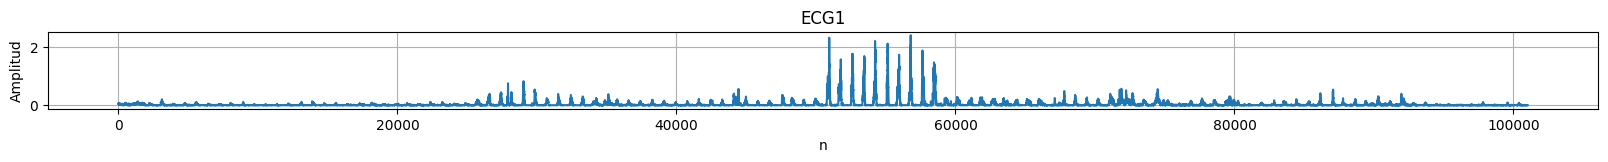

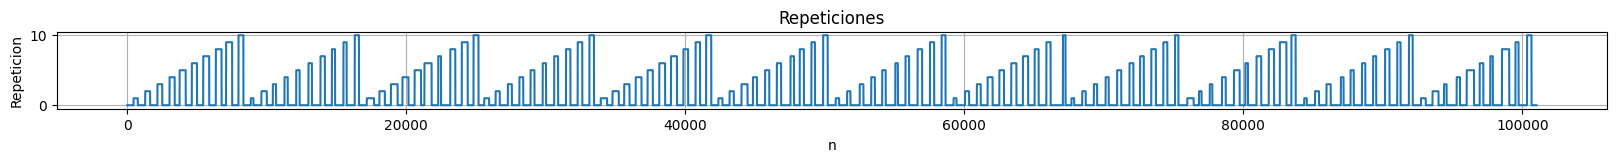

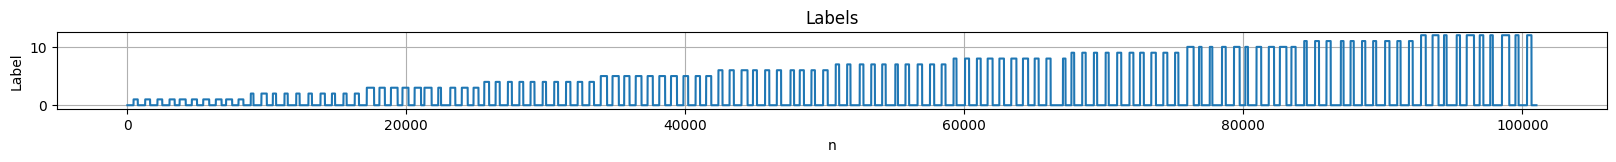

In [ ]:
samples = 101014

"""
for i in emgs.columns:
  graficar_serie1(emgs[i],
                 titulo=f"ECG{i}",
                 num_puntos = samples,
                 etiqueta_x="n",
                 etiqueta_y="Amplitud")
"""

graficar_serie1(emgs[0],
               titulo="ECG1",
               num_puntos = samples,
               etiqueta_x="n",
               etiqueta_y="Amplitud")

graficar_serie1(repetitions[0],
               titulo="Repeticiones",
               num_puntos = samples,
               etiqueta_x="n",
               etiqueta_y="Repeticion")

graficar_serie1(labels[0],
               titulo="Labels",
               num_puntos = samples,
               etiqueta_x="n",
               etiqueta_y="Label")

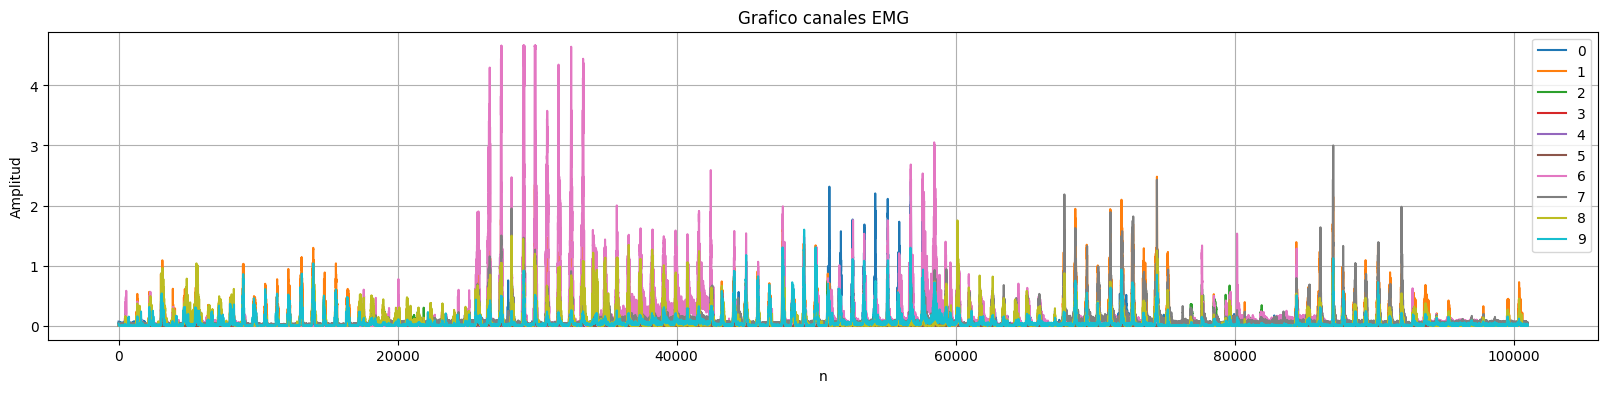

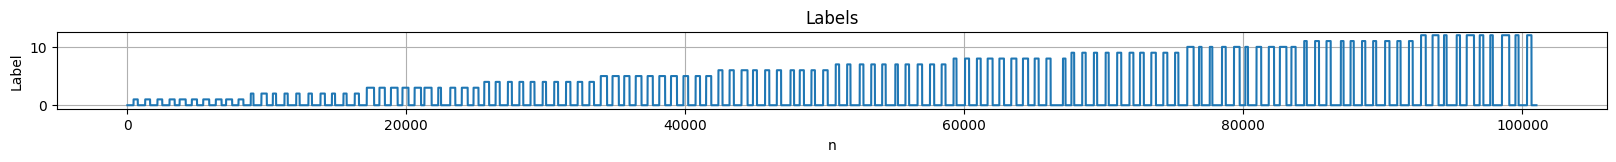

In [ ]:
graficar_varias_columnas(emgs,
                         columnas = emgs.columns,
                         titulo = "Grafico canales EMG",
                         etiqueta_x="n",
                         etiqueta_y="Amplitud")

graficar_serie1(labels[0],
               titulo="Labels",
               num_puntos = samples,
               etiqueta_x="n",
               etiqueta_y="Label")

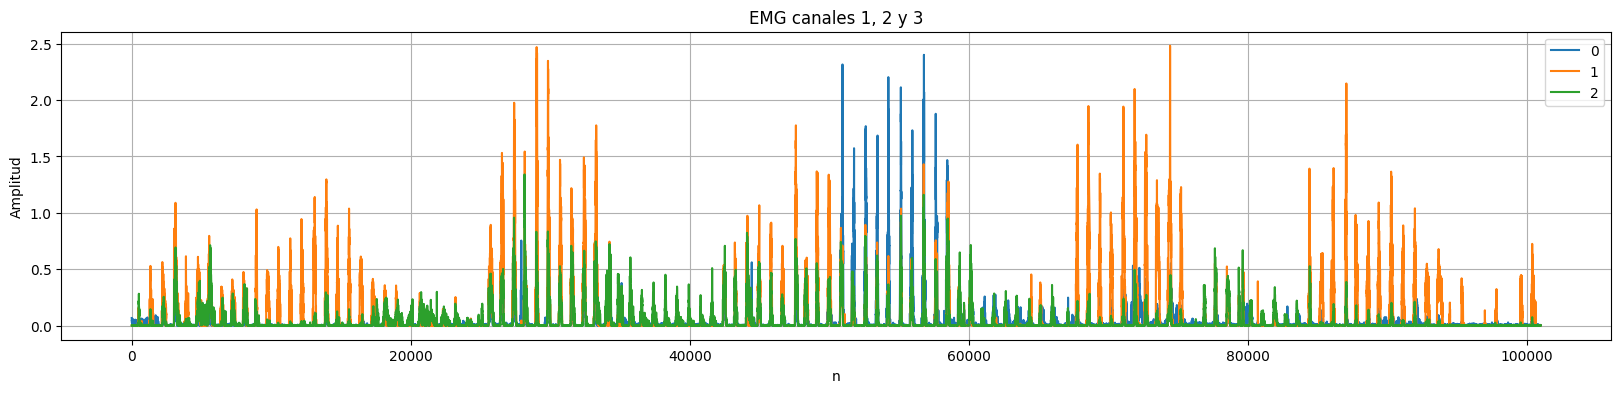

In [ ]:
graficar_varias_columnas(emgs, columnas = emgs.columns[:3],
                         titulo="EMG canales 1, 2 y 3", etiqueta_x="n", etiqueta_y="Amplitud")

In [ ]:
print(indice_numero(labels[0], 1))


(440, 8315)


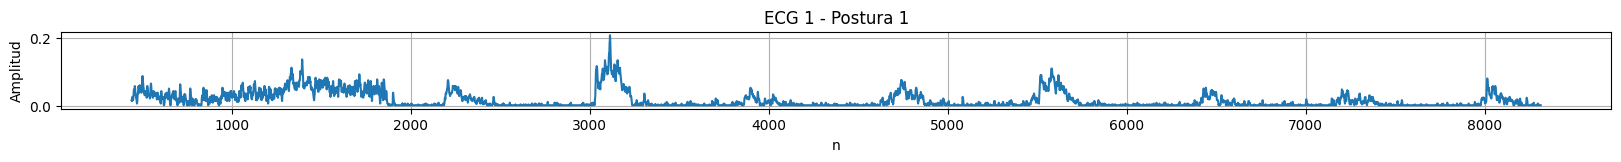

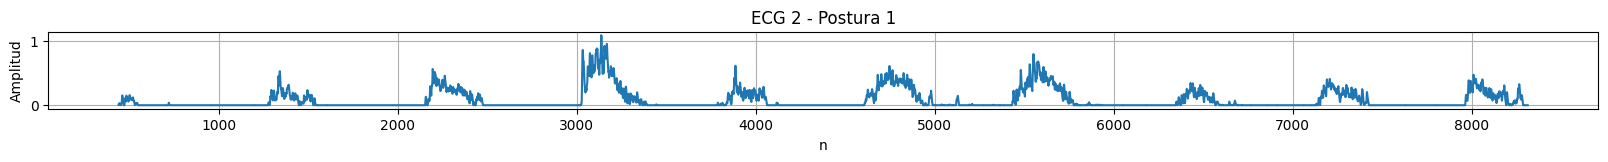

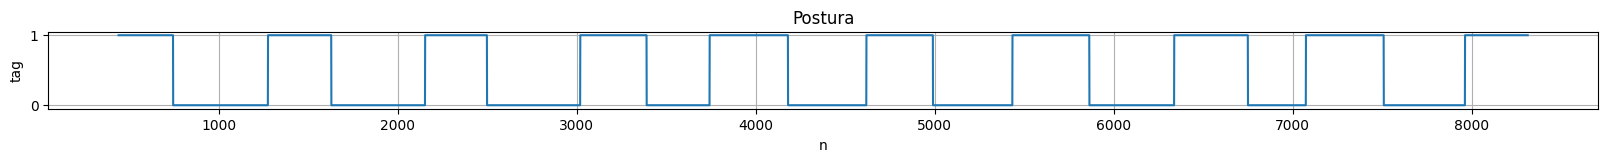

In [ ]:
puntos_postura1 = indice_numero(labels[0], 1)
graficar_serie1(emgs[0],punto_inicial = puntos_postura1[0], num_puntos = puntos_postura1[1] - puntos_postura1[0], titulo="ECG 1 - Postura 1", etiqueta_x="n", etiqueta_y="Amplitud")
graficar_serie1(emgs[1],punto_inicial = puntos_postura1[0], num_puntos = puntos_postura1[1] - puntos_postura1[0], titulo="ECG 2 - Postura 1", etiqueta_x="n", etiqueta_y="Amplitud")
graficar_serie1(labels[0], punto_inicial = puntos_postura1[0], num_puntos = puntos_postura1[1] - puntos_postura1[0], titulo="Postura", etiqueta_x="n", etiqueta_y="tag")


In [ ]:
detectar_cambios_nivel(labels[0], 1)

[(440, 1),
 (744, 1),
 (745, 0),
 (1274, 0),
 (1275, 1),
 (1628, 1),
 (1629, 0),
 (2152, 0),
 (2153, 1),
 (2498, 1),
 (2499, 0),
 (3019, 0),
 (3020, 1),
 (3390, 1),
 (3391, 0),
 (3742, 0),
 (3743, 1),
 (4180, 1),
 (4181, 0),
 (4618, 0),
 (4619, 1),
 (4990, 1),
 (4991, 0),
 (5434, 0),
 (5435, 1),
 (5864, 1),
 (5865, 0),
 (6338, 0),
 (6339, 1),
 (6750, 1),
 (6751, 0),
 (7074, 0),
 (7075, 1),
 (7509, 1),
 (7510, 0),
 (7963, 0),
 (7964, 1),
 (8315, 1)]

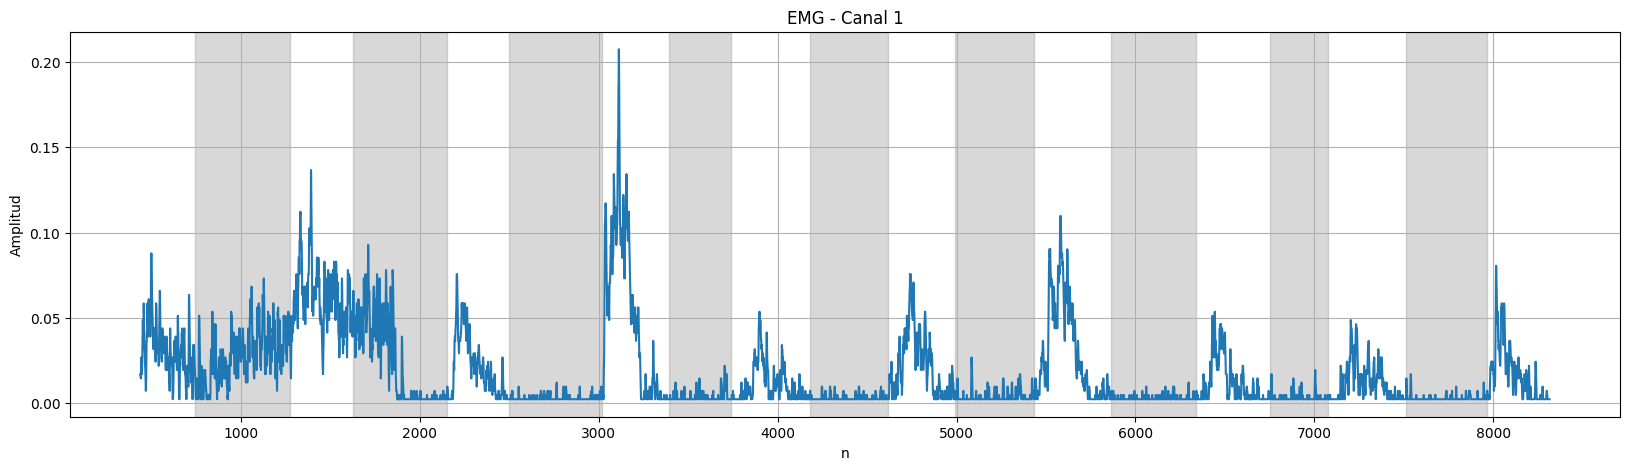

In [ ]:
graficar_serie3(df_medida = emgs[0],
                df_num_label= labels[0],
                num = 1,
                titulo = "EMG - Canal 1",
                etiqueta_x = "n",
                etiqueta_y = "Amplitud")

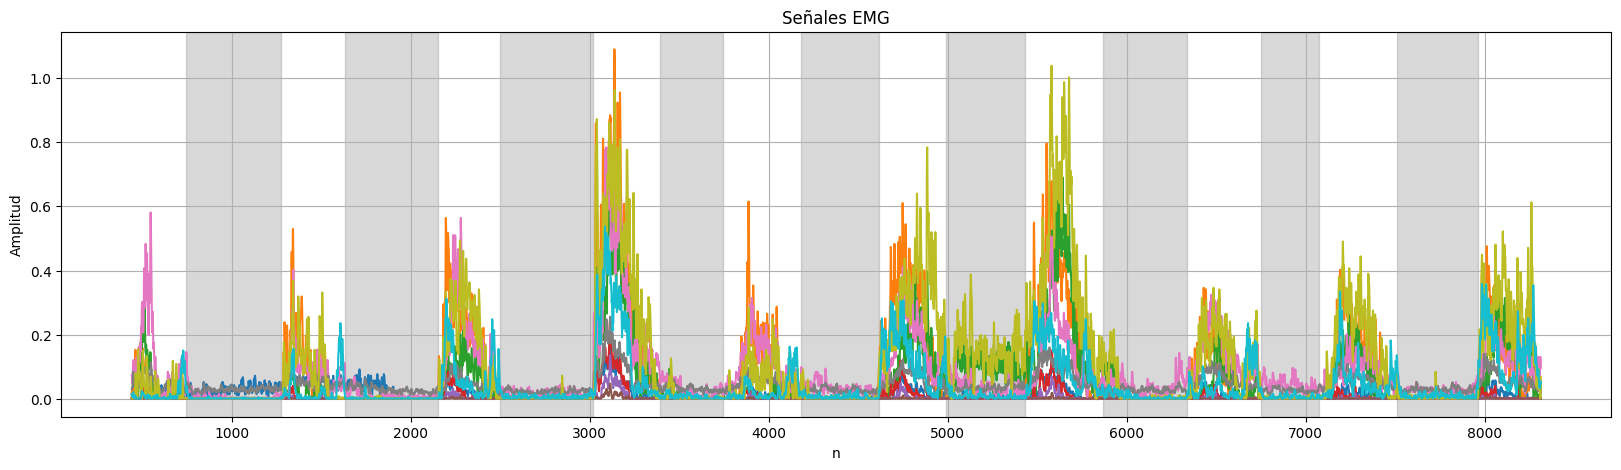

In [ ]:
graficar_series4(df_medida= emgs,
                columnas_medida = emgs.columns,
                df_num_label = labels[0],
                num = 1,
                titulo="Señales EMG",
                etiqueta_x="n",
                etiqueta_y="Amplitud")

## Filtrado

Para mas información del filtrado:
* **Documentacion**: https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.butter.html
* **Ejemplos**:
  * https://medium.com/analytics-vidhya/how-to-filter-noise-with-a-low-pass-filter-python-885223e5e9b7
  * https://gist.github.com/junzis/e06eca03747fc194e322
  * https://github.com/scipy/scipy-cookbook/blob/main/ipython/ButterworthBandpass.ipynb
  * https://colab.research.google.com/drive/1HBuM2ifbsRZ6JaFLiz9aJqJBbnxISI8d?usp=sharing
  * https://github.com/pxcandeias/py-notebooks/blob/master/scipy_signal_filters_demonstration.ipynb
  * https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/preprocessing_and_decomposition/Signal_Filters.ipynb
  * https://gwosc.org/s/events/GW150914/GW150914_tutorial.html

> **Del paper**: "All data are synchronized by linearly interpolating
>all data to the highest recording frequency (i.e., 100Hz). Both sEMG
> and Cyberglove signals are subsequently low-pass filtered
> at 1Hz using a zero-phase second order Butterworth filter."



In [ ]:
 # perform 2-order 1Hz low-pass filter
order = 2
fs = 100 # sample rate: 100Hz
cutoff = 1 # cutoff frequency
nyq = 0.5 * fs
normal_cutoff = cutoff / nyq
b, a = signal.butter(order, normal_cutoff, 'lowpass')
filter_emgs = pd.DataFrame()
for _col in range(emgs.shape[1]):
  filter_emgs[_col] = signal.filtfilt(b, a, emgs[_col])


In [ ]:
filter_emgs.head()

,0,1,2,3,4,5,6,7,8,9
0,0.066950,0.002404,0.002456,0.002404,0.002403,0.009800,0.0024,0.048777,0.0024,0.031794
1,0.065538,0.002404,0.002460,0.002405,0.002403,0.009380,0.0024,0.048057,0.0024,0.030317
2,0.064147,0.002404,0.002464,0.002405,0.002403,0.008972,0.0024,0.047359,0.0024,0.028843
3,0.062784,0.002404,0.002468,0.002405,0.002403,0.008581,0.0024,0.046696,0.0024,0.027390
4,0.061455,0.002405,0.002472,0.002406,0.002403,0.008207,0.0024,0.046075,0.0024,0.025972


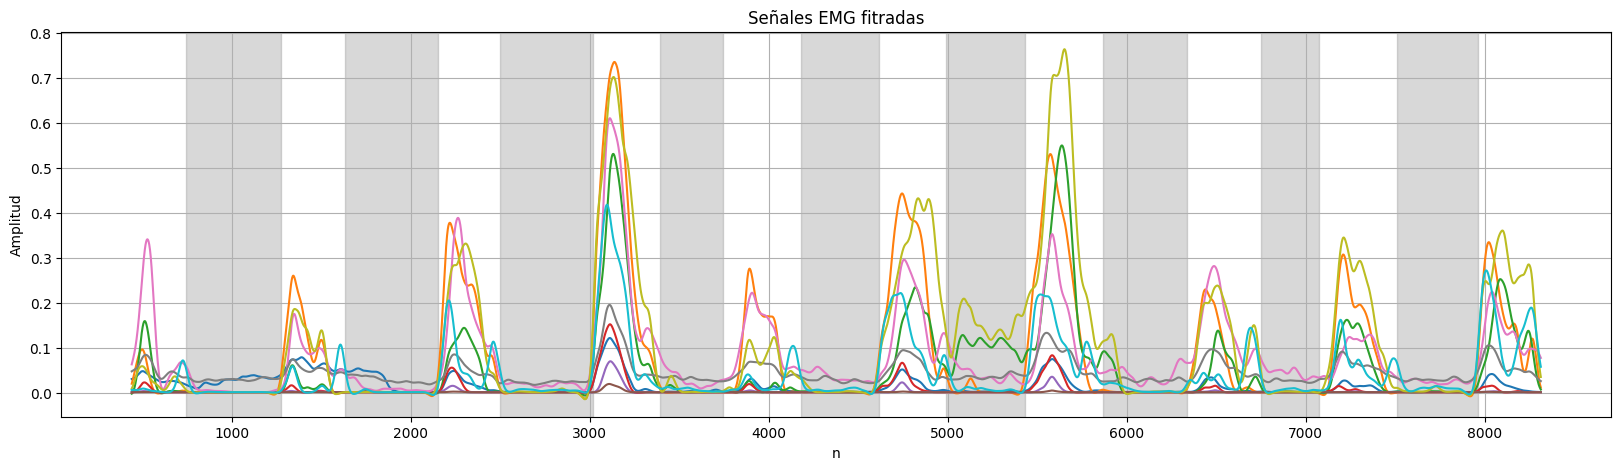

In [ ]:
graficar_series4(df_medida= filter_emgs,
                columnas_medida = emgs.columns,
                df_num_label = labels[0],
                num = 1,
                titulo="Señales EMG fitradas",
                etiqueta_x="n",
                etiqueta_y="Amplitud")

In [ ]:
# https://github.com/parasgulati8/NinaPro-Helper-Library/blob/master/NinaPro_Utility.py
def filter_data(data, f, butterworth_order = 4, btype = 'lowpass'):
    emg_data = data.values[:,:12]

    f_sampling = 2000
    nyquist = f_sampling/2
    if isinstance(f, int):
        fc = f/nyquist
    else:
        fc = list(f)
        for i in range(len(f)):
            fc[i] = fc[i]/nyquist

    b,a = signal.butter(butterworth_order, fc, btype=btype)
    transpose = emg_data.T.copy()

    for i in range(len(transpose)):
        transpose[i] = (signal.lfilter(b, a, transpose[i]))

    filtered = pd.DataFrame(transpose.T)
    filtered['stimulus'] = data['stimulus']
    filtered['repetition'] = data['repetition']

    return filtered


## Normalizacion

La transformación **μ-law** se define por la siguiente ecuación:

$$
F(x) = \frac{\log(1 + \mu |x|)}{\log(1 + \mu)} \cdot \text{sgn}(x)
$$

In [ ]:
# Codigo tomado de: https://github.com/increase24/Ninapro-dataset-processing/blob/master/dataloaders/db1.py
# u-law normalization
u = 256
filter_emgs_norm = np.sign(filter_emgs) * np.log(1+u*abs(filter_emgs))/np.log(1+u)

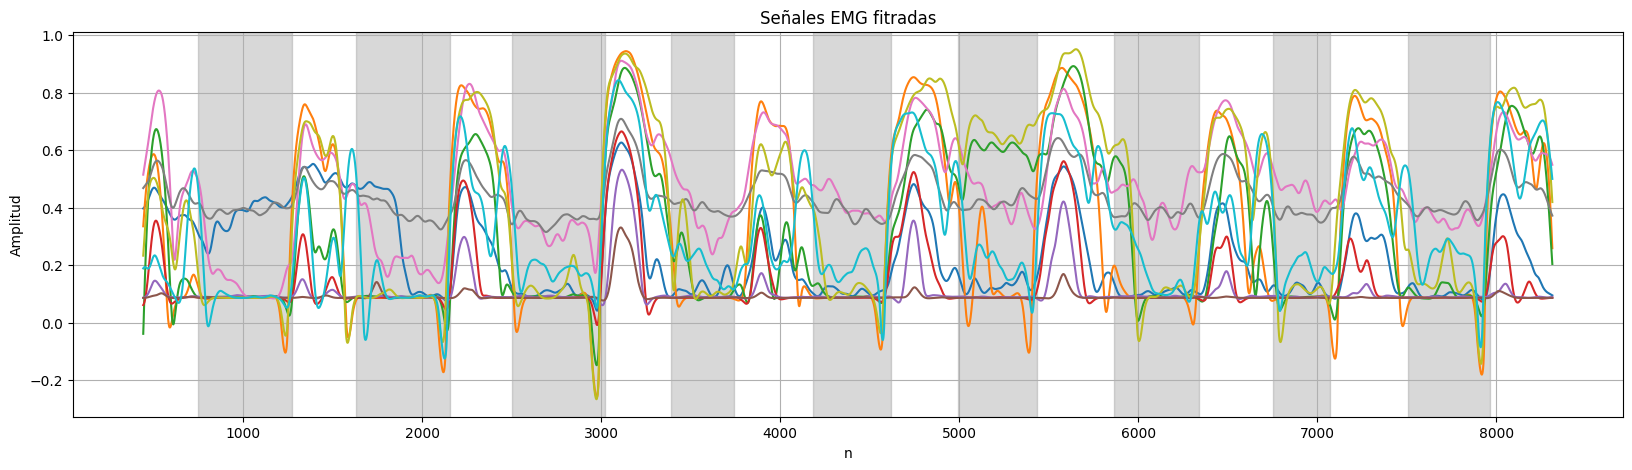

In [ ]:
graficar_series4(df_medida= filter_emgs_norm,
                columnas_medida = emgs.columns,
                df_num_label = labels[0],
                num = 1,
                titulo="Señales EMG fitradas",
                etiqueta_x="n",
                etiqueta_y="Amplitud")

In [ ]:
# https://github.com/parasgulati8/NinaPro-Helper-Library/blob/master/NinaPro_Utility.py
def normalise(data, train_reps):
    x = [np.where(data.values[:,13] == rep) for rep in train_reps]
    indices = np.squeeze(np.concatenate(x, axis = -1))
    train_data = data.iloc[indices, :]
    train_data = data.reset_index(drop=True)

    scaler = StandardScaler(with_mean=True,
                                with_std=True,
                                copy=False).fit(train_data.iloc[:, :12])

    scaled = scaler.transform(data.iloc[:,:12])
    normalised = pd.DataFrame(scaled)
    normalised['stimulus'] = data['stimulus']
    normalised['repetition'] = data['repetition']
    return normalised

## Segmentacion

Al respecto el articulo original dice lo siguiente:

> "Samples with an ambiguous label, that is those recorded during  
> transition between rest and the actual movement, are removed by
> dividing each movement (including rest) in three equally sized
> segments and only retaining data from the center segment. To ensure
> computational feasibility, we then average the data contained in
> this center segment to obtain a single sample per movement. Note
> that there are thus ten samples for each subject-movement combination
> (i.e., one per repetition) and that half of the samples belong
> to the rest movement. "

In [ ]:
# Codigo tomado de: https://github.com/increase24/Ninapro-dataset-processing/blob/master/dataloaders/db1.py

# segmentation of training and testing samples
length_dots = len(labels) # 101014
data_train = []
labels_train = []
data_val = []
labels_val = []
print(length_dots)

# [20]
seq_lens = [20] # sample rate: 100Hz -> 1 dot: 10ms
step = 1
# length_dots%seq_len = 101014%20 = 14
# length_dots - length_dots%seq_len = 101014 - 101014%20 = 101000
for seq_len in seq_lens:
  for idx in range(0, length_dots - length_dots%seq_len, step):
    if labels.iloc[idx][0] > 0 and labels.iloc[idx + seq_len - 1][0] > 0 and labels.iloc[idx][0] == labels.iloc[idx+seq_len-1][0]:
      repetition = repetitions.iloc[idx][0]
      # if repetition in [2,5,7]: # val dataset
      #    data_val.append(emgs[idx:idx+seq_len,:])
      #   labels_val.append(labels[idx])
      # else: # train dataset
      #   data_train.append(emgs[idx:idx+seq_len,:])
      #   labels_train.append(labels[idx])
print(repetition)

101014
10


### windowing()

`windowing()` is used to augment the data. The function requires the following arguements : `data`, `reps`, `gestures`, `win_len`, `win_stride`.
* `data` = Pandas dataframe just like returned by any of the above functions
* `reps` = Repetitions that you want to use for windowing
* `gestures` = The gesture movements that you wish to classify
* `win_len` = (Length of window in milisecond) x 2. For example, for a
 window of 300ms, use 600 as the win_len since the sampling frequency of signal is 2000Hz.
* `win_stride` = (Length of stride in milisecond) x 2. For example, for a stride of 10ms, use 20 as the win_stride since the sampling frequency of signal is 2000Hz.

In [ ]:
# Tomada de https://github.com/parasgulati8/NinaPro-Helper-Library/blob/master/NinaPro_Utility.py
def windowing(data, reps, gestures, win_len, win_stride):
    if reps:
        x = [np.where(data.values[:,13] == rep) for rep in reps]
        indices = np.squeeze(np.concatenate(x, axis = -1))
        data = data.iloc[indices, :]
        data = data.reset_index(drop=True)

    if gestures:
        x = [np.where(data.values[:,12] == move) for move in gestures]
        indices = np.squeeze(np.concatenate(x, axis = -1))
        data = data.iloc[indices, :]
        data = data.reset_index(drop=True)

    idx=  [i for i in range(win_len, len(data), win_stride)]

    X = np.zeros([len(idx), win_len, len(data.columns)-2])
    y = np.zeros([len(idx), ])
    reps = np.zeros([len(idx), ])

    for i,end in enumerate(idx):
        start = end - win_len
        X[i] = data.iloc[start:end, 0:12].values
        y[i] = data.iloc[end, 12]
        reps[i] = data.iloc[end, 13]

    return X, y, reps

In [ ]:
def rectify(data):
    return abs(data)


De [FeaturesExtraction.py](https://github.com/cnzero/NinaproCNN/blob/master/FeaturesExtraction.py) se dacaron las siguientes funciones:

In [ ]:
def fRMS(d):
    return np.sqrt( np.mean( np.square(d), axis=0, keepdims=True ) )

def fMAV(d):
    return np.mean(np.abs(d), axis=0, keepdims=True)

def fZC(d):
    d = np.array(d)
    nZC = 0
    th = np.mean(d, axis=0, keepdims=True)
    th = abs(th)
    for i in range(1, d.shape[0]):
        if d[i-1]<th and d[i]>th:
            nZC += 1
        elif d[i-1]>th and d[i]<th:
            nZC += 1

    return nZC/d.shape[0]

def fSSC(d):
    d = np.array(d)
    nSSC = 0
    th = np.mean(d, axis=0, keepdims=True)
    th = abs(th)
    for i in range(2, d.shape[0]):
        diff1 = d[i] - d[i-1]
        diff2 = d[i-1]-d[i-2]
        if abs(diff1)>th and abs(diff2)>th and (diff1*diff2)<0:
            nSSC += 1
    return nSSC/d.shape[0]

def fVAR(d):
    return np.var(d, axis=0)

> **Importante**
> Se uso IA para generar codigo en muchas partes

### Preguntas

1. ¿Cual columna deberia ser el label?
2. ¿Es necesario tener ademas de las columnas de los sensores las otras (tal vez por correlacion por ejemplo)?
3. ¿Como se deberia construir el vector de entradas y el de labels?, ¿de toda la información como seria el caso?


## Pendientes

Ver los siguientes codigos:
* https://github.com/parasgulati8/NinaPro-Helper-Library
* https://github.com/Lif3line/nina_helper_package_mk2
* https://github.com/cnzero/NinaproCNN/tree/master
* https://github.com/sebastiankmiec/NinaTools
* https://github.com/sun2009ban/divide_NinaPro_database_5
* https://github.com/tsagkas/sEMG-HandGestureRecognition (codigo + tesis)
* https://repositorio.unbosque.edu.co/items/61d39597-5a61-491c-909a-849e53efe8ad


En https://github.com/parasgulati8/NinaPro-Helper-Library/blob/master/ esta lo que necesitamos de alguna manera.